# COURSE: PCA and multivariate neural signal processing
## SECTION: Creating and interpreting covariance matrices
### VIDEO: Python: covariance with real data
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [24]:
# load data
matfile = sio.loadmat('MATLAB_data_files/sampleEEGdata')
EEG = matfile['EEG'][0,0]


## average of single-trial covariances

# specify time window (ms) for covariance matrix
tidx1 = np.argmin(np.abs(EEG['times']))
tidx2 = np.argmin(np.abs(EEG['times']-800))


# loop over trials and compute covariance for each trial
covmatT = np.zeros( (int(EEG['nbchan']),int(EEG['nbchan'])) )


for triali in range(int(EEG['trials'])):
    
    # data from this trial and time window
    tmpdat = EEG['data'][:,tidx1:tidx2,triali]
    
    # mean-center
    for ci in range(int(EEG['nbchan'])):
        tmpdat[ci,:] -= np.mean(tmpdat[ci,:])
    # covariance
    covmatT += tmpdat@tmpdat.T / (tidx2-tidx1)

# divide by N
covmatT = covmatT/EEG['trials']


In [43]:
## covariance of trial average

# trial average
erp = np.mean(EEG['data'][:,tidx1:tidx2,:],axis=2)

# mean-center and covariance
for ci in range(int(EEG['nbchan'])):
    erp[ci,:] -= np.mean(erp[ci,:])

covmatA = erp@erp.T / (tidx2-tidx1)
print(int(EEG['nbchan']))
print(EEG['data'][:,tidx1:tidx2,:].shape)
longMat = np.concatenate((EEG['data'][:,tidx1:tidx2,:]).T,axis=0).T
covmatZ = longMat@longMat.T / (longMat.shape[1])

64
(64, 205, 99)


In [41]:
longMat.shape

(64, 64)

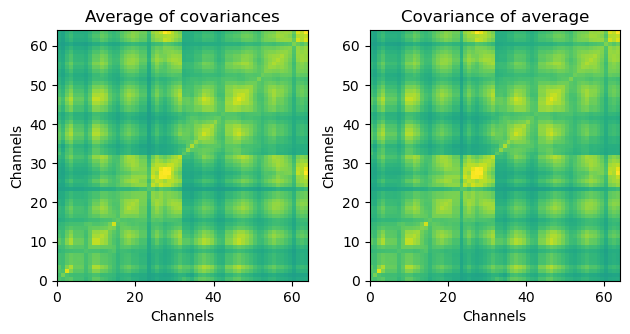

In [49]:
## show the covariance matrices

plt.subplot(121)
plt.pcolormesh(covmatT,vmin=-100,vmax=100)
plt.axis('square')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.title('Average of covariances')

plt.subplot(122)
plt.pcolormesh(covmatZ,vmin=-100,vmax=100)
plt.axis('square')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.title('Covariance of average')

plt.tight_layout()
plt.show()